In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy


In [2]:
x = np.linspace(1,20,50)
y= np.sin(np.sqrt(x)) + 0.1 * np.random.normal(0,1,x.shape)

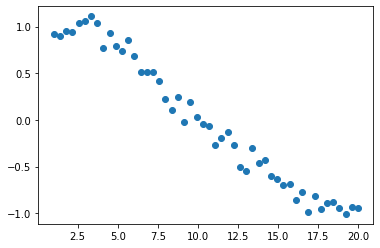

In [3]:
plt.scatter (x,y)

$$ y =\sum_{i=0}^{N} a_i x_i\longrightarrow \sum_{i=0}^{n}  a_i  \phi (x_i)  $$ 

In [4]:
def gauss(x,c,s=1):
     return np.exp(-(x-c)**2/s)

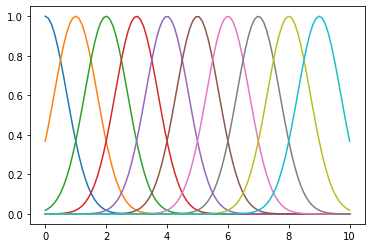

In [5]:
centers = [i for i in range (0,10,1)]
for center in centers : 
     plt.plot(np.linspace(0,10,100),gauss(np.linspace(0,10,100),center,s=1)) 


In [6]:
x.shape 

(50,)

In [7]:
len(centers)

10

In [8]:
Phi = np.empty((x.shape[0], len(centers))) 
Phi.shape
for i in range (Phi.shape[0]):
     for j in range(Phi.shape[1]):
          Phi[i,j] = gauss(x[i],centers[j],s=5)


In [9]:
Phi.shape  ## shod ye matrix 

(50, 10)

In [10]:
a =np.linalg.inv(Phi.T @Phi) @Phi.T @ y 

In [11]:
a ## this is a in aboves formula 

array([  32.61076676,  -78.93834871,  116.39492505, -132.69801384,
        129.94790115, -109.59287061,   79.33261611,  -45.96719435,
         19.614316  ,   -4.63634592])

In [12]:
f= 0
for i in range (len(centers)):
     f+=a[i]*gauss(x,centers[i],s=5)

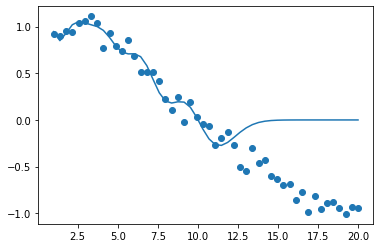

In [13]:
plt.scatter (x,y)
plt.plot(x,f)

# UBER datasets 


In [14]:
data = pd.read_csv('../DATA/uber.csv')

In [15]:
data 

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [16]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [28]:
data.isna().sum()

Unnamed: 0           0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
hour                 0
minute               0
dtype: int64

In [18]:
data = data.dropna()

In [19]:
data.nunique()


Unnamed: 0           199999
key                  199999
fare_amount            1244
pickup_datetime      196628
pickup_longitude      71065
pickup_latitude       83835
dropoff_longitude     76894
dropoff_latitude      90585
passenger_count           8
dtype: int64

In [20]:
data = data.drop(columns=['key']).reset_index(drop=True)

In [21]:
data 

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199994,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199995,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199996,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199997,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [22]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [23]:
data.dtypes

Unnamed: 0                         int64
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [24]:
data ['year'] = data['pickup_datetime'].dt.year
data['month'] = data['pickup_datetime'].dt.month
data['day'] = data['pickup_datetime'].dt.day
data ['hour'] = data['pickup_datetime'].dt.weekday

data ['hour'] = data['pickup_datetime'].dt.hour
data['minute'] = data['pickup_datetime'].dt.minute


In [25]:
data = data.drop(columns= ['pickup_datetime'])

In [29]:
data ## now this data ready to leraning regression model 


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,52
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,45
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,22
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,47
...,...,...,...,...,...,...,...,...,...,...,...,...
199994,42598914,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,28,10,49
199995,16382965,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,14,1,9
199996,27804658,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,29,0,42
199997,20259894,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,20,14,56


In [30]:
from sklearn.model_selection import train_test_split 


In [31]:
X = data.drop(columns=['fare_amount'])
y= data ['fare_amount']

In [45]:
X_train ,  X_test , y_train, y_test = train_test_split(X,y,test_size=.35)

In [48]:
X_train.shape  ,  X_test.shape   , y_train.shape , y_test.shape 

((129999, 11), (70000, 11), (129999,), (70000,))

In [49]:
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error , max_error

In [40]:
# reg = SVR(kernel='rbf').fit(X_train,y_train)

In [41]:
reg2= DecisionTreeRegressor(criterion='squared_error').fit(X_train,y_train)

In [52]:
lreg= LinearRegression().fit(X_train,y_train)

In [50]:
print (r2_score(y_true= y_test ,  y_pred= reg2.predict(X_test)))
print (mean_squared_error(y_true= y_test ,  y_pred=reg2.predict(X_test)))
print (max_error(y_true= y_test ,  y_pred=reg2.predict(X_test)))


0.8330143218344226
16.158086041428575
343.5


In [53]:
print (r2_score(y_true= y_test ,  y_pred= lreg.predict(X_test)))
print (mean_squared_error(y_true= y_test ,  y_pred=lreg.predict(X_test)))
print (max_error(y_true= y_test ,  y_pred=lreg.predict(X_test)))


0.01482461675962865
95.3288257003154
336.0801601599137
